In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the cereal dataset
url = "C:\\Users\\DELL\\Downloads\\cereal.csv"
cereal_df = pd.read_csv(url)

# Display the first few rows of the dataset
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
# Display basic statistics of the dataset
print(cereal_df.describe())


         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

In [13]:
# Display basic statistics of the dataset
print(cereal_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None


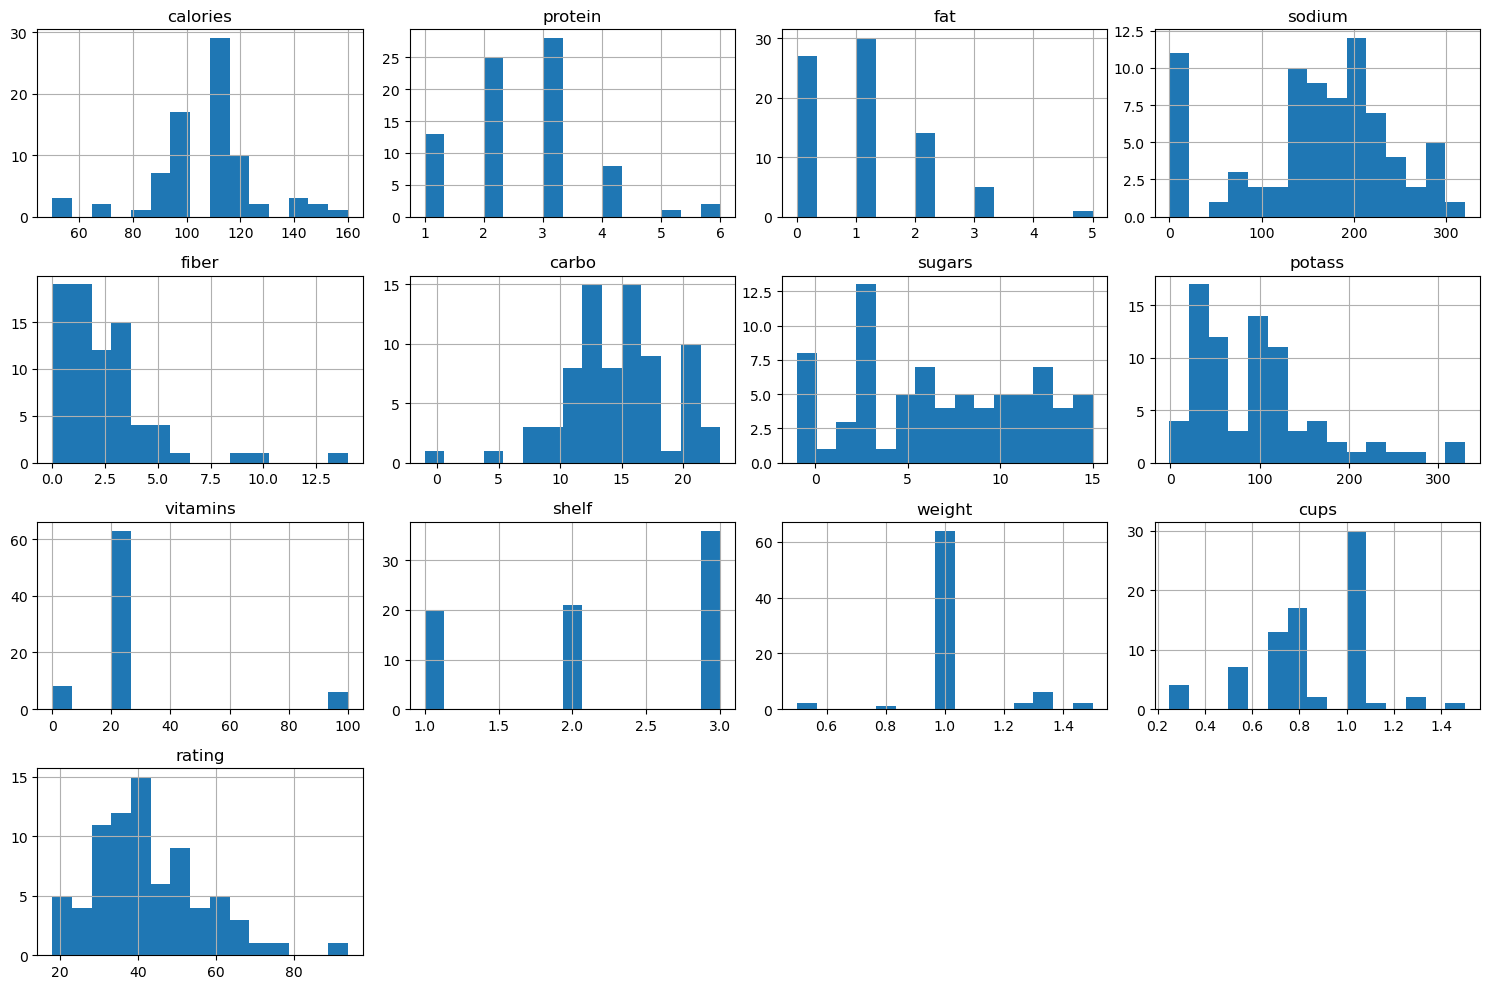

In [10]:
# Histograms for each numerical column
cereal_df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


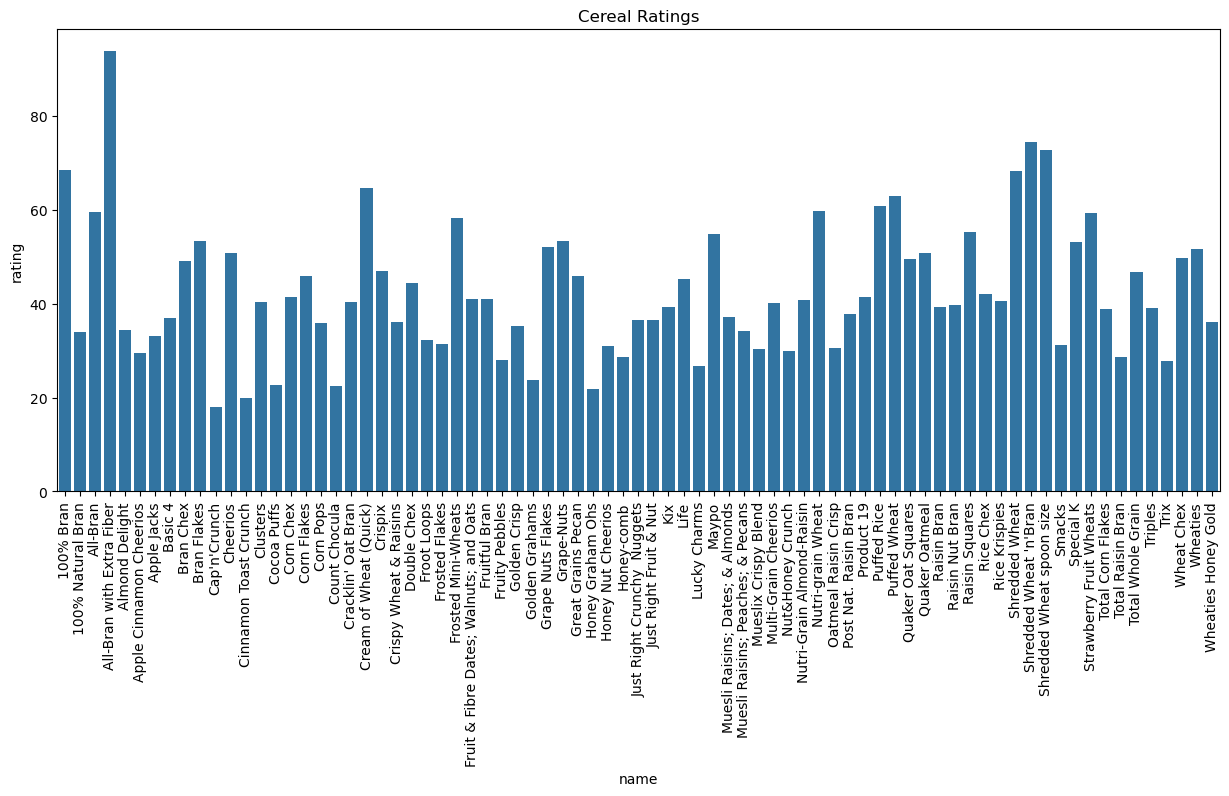

In [12]:
# Bar chart for cereal ratings
plt.figure(figsize=(15, 6))
sns.barplot(x='name', y='rating', data=cereal_df)
plt.xticks(rotation=90)
plt.title('Cereal Ratings')
plt.show()


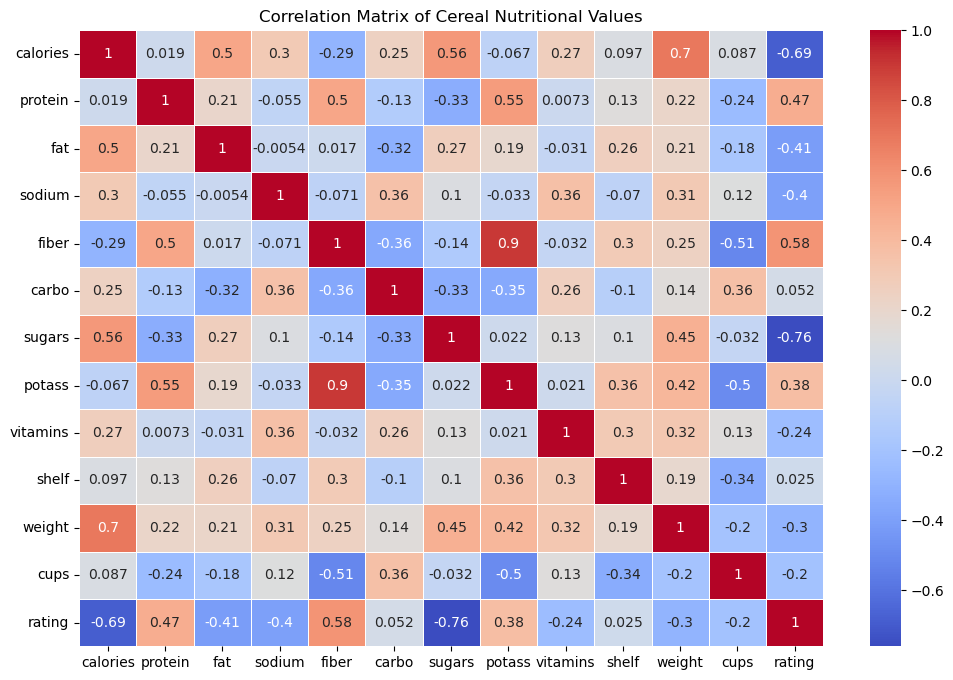

In [20]:
# Compute the correlation matrix
df = cereal_df.select_dtypes(include=['int','float'])
correlation_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Cereal Nutritional Values')
plt.show()


In [28]:
# Quality Score Calculation
# Define a quality score based on some criteria (example: high fiber, low sugar)
cereal_df['quality_score'] = cereal_df['fiber'] - cereal_df['sugars']
cereals_sorted = cereal_df.sort_values(by='quality_score', ascending=False)

print("Top 10 Quality Cereals:")
print(cereals_sorted[['name', 'quality_score']].head(10))

Top 10 Quality Cereals:
                         name  quality_score
3   All-Bran with Extra Fiber           14.0
0                   100% Bran            4.0
2                    All-Bran            4.0
64     Shredded Wheat 'n'Bran            4.0
57             Quaker Oatmeal            3.7
63             Shredded Wheat            3.0
65  Shredded Wheat spoon size            3.0
11                   Cheerios            1.0
50          Nutri-grain Wheat            1.0
55               Puffed Wheat            1.0


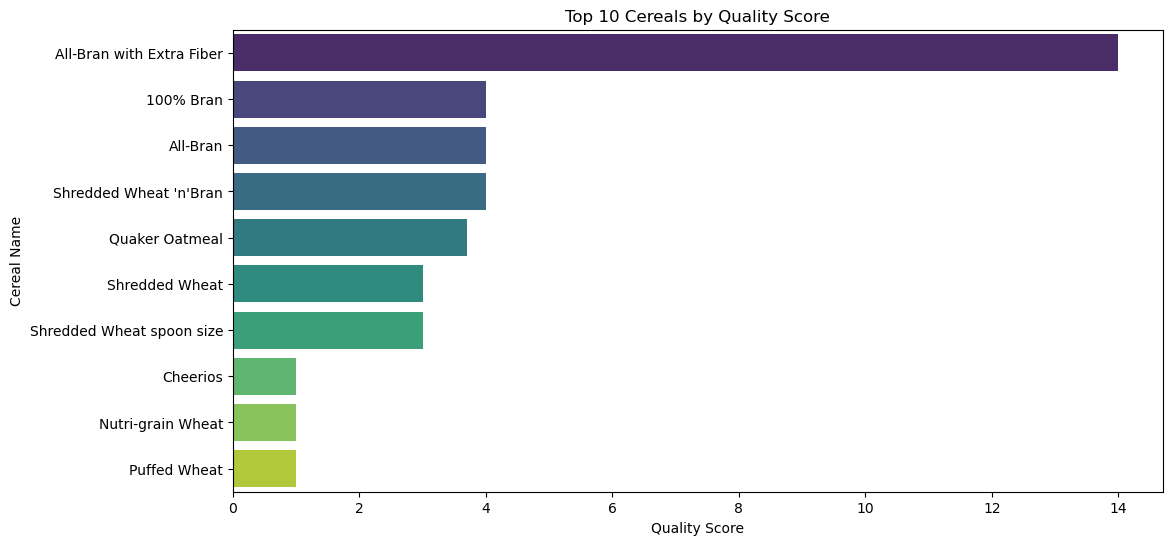

In [32]:
# Bar plot of top 10 cereals by quality score
plt.figure(figsize=(12, 6))
top_10_cereals = cereals_sorted.head(10)
sns.barplot(x='quality_score', y='name', hue='name',data=top_10_cereals, palette='viridis')
plt.xlabel('Quality Score')
plt.ylabel('Cereal Name')
plt.title('Top 10 Cereals by Quality Score')
plt.show()


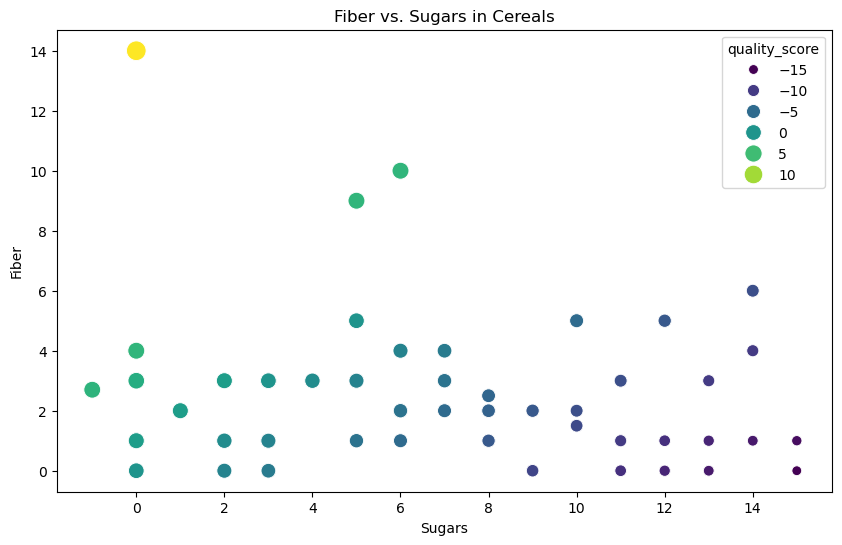

In [36]:
# Scatter plot of fiber vs. sugar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sugars', y='fiber', hue='quality_score', size='quality_score', data=cereal_df, palette='viridis', sizes=(50, 200))
plt.xlabel('Sugars')
plt.ylabel('Fiber')
plt.title('Fiber vs. Sugars in Cereals')
plt.show()

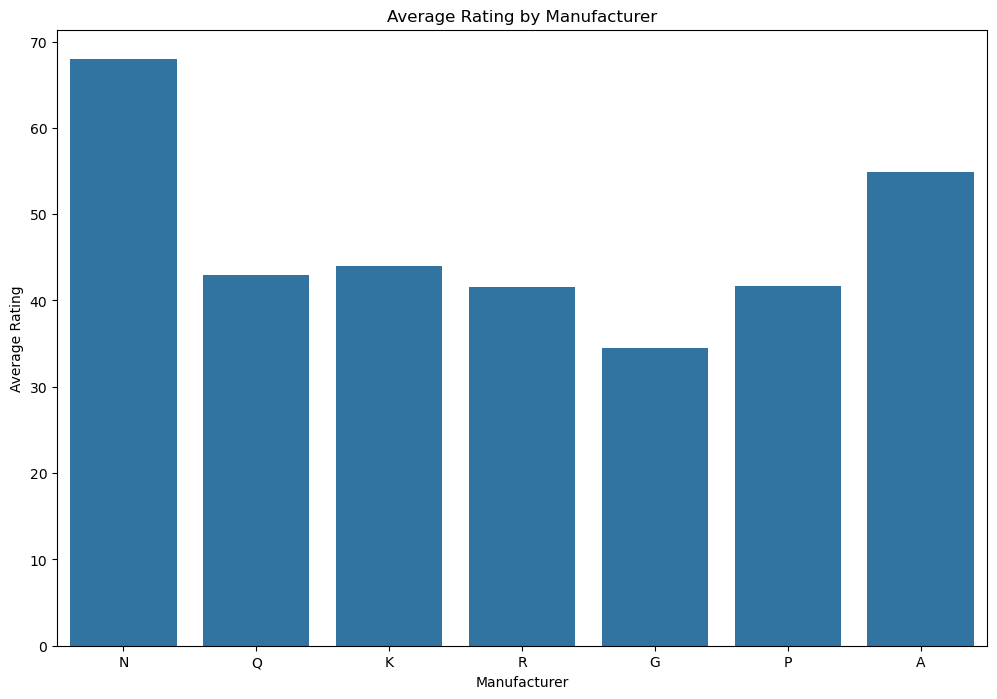

In [10]:
# Average rating by manufacturer
plt.figure(figsize=(12, 8))
sns.barplot(x='mfr', y='rating', data=cereal_df, errorbar=None)
plt.title('Average Rating by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Rating')
plt.show()

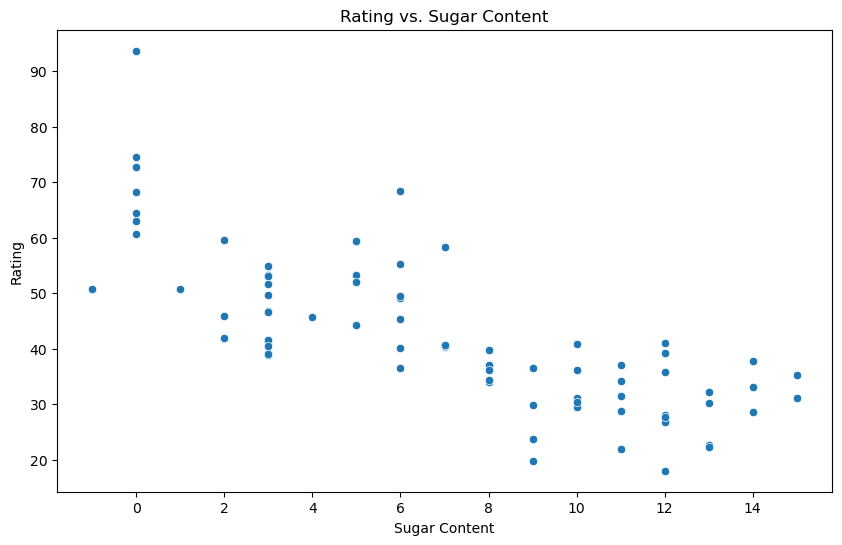

In [12]:

# Scatter plot of rating vs. sugar content
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sugars', y='rating', data=cereal_df)
plt.title('Rating vs. Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Rating')
plt.show()

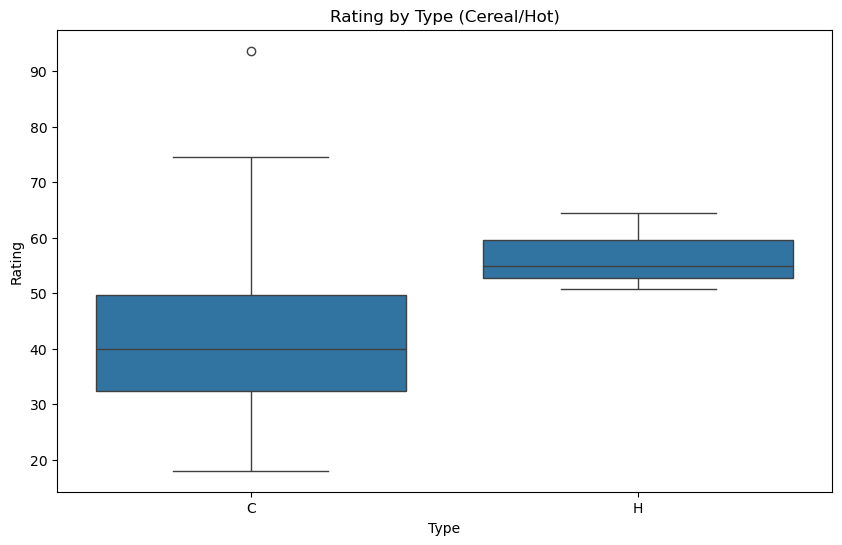

In [14]:
# Box plot of rating by type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=cereal_df)
plt.title('Rating by Type (Cereal/Hot)')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()